In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
import pickle
import math
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, SelectKBest

In [42]:
total_data=pd.read_csv("../data/interim/dataset_binario_junto.csv")

print(total_data.shape)

total_data.info()

(119750, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119750 entries, 0 to 119749
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         119750 non-null  int64  
 1   title                      119750 non-null  object 
 2   company_display_name       119089 non-null  object 
 3   contract_time              29763 non-null   object 
 4   salary_min                 119730 non-null  float64
 5   salary_max                 119459 non-null  float64
 6   created                    119750 non-null  int64  
 7   latitude                   114833 non-null  float64
 8   longitude                  114833 non-null  float64
 9   redirect_url               119750 non-null  object 
 10  description_full           119749 non-null  object 
 11  remote                     119750 non-null  int64  
 12  permanent_contract         119750 non-null  int64  
 13  freelance       

In [43]:
if total_data.drop("id", axis = 1).duplicated().sum() > 0:
    total_data.drop_duplicates(subset = total_data.columns.difference(['id']))

print(total_data.shape)

(119750, 31)


In [44]:
total_data.drop(["id", "salary_min", "salary_max", "latitude", "longitude", "redirect_url", "description_full","title","3", "county", "city"], axis = 1, inplace = True)
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119750 entries, 0 to 119749
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   company_display_name       119089 non-null  object 
 1   contract_time              29763 non-null   object 
 2   created                    119750 non-null  int64  
 3   remote                     119750 non-null  int64  
 4   permanent_contract         119750 non-null  int64  
 5   freelance                  119750 non-null  int64  
 6   bonuses                    119750 non-null  int64  
 7   career_development         119750 non-null  int64  
 8   immediate_start            119750 non-null  int64  
 9   startup                    119750 non-null  int64  
 10  multinational              119750 non-null  int64  
 11  consulting_or_outsourcing  119750 non-null  int64  
 12  experience_gt_5            119750 non-null  int64  
 13  higher_education           11

In [45]:
total_data.drop(["contract_time","startup","multinational"], axis = 1, inplace = True)


In [46]:
# Eliminar filas donde salary_avg es NaN
total_data = total_data.dropna(subset=["salary_avg"])

# Eliminar filas donde salary_avg es 0
total_data = total_data[total_data["salary_avg"] != 0]


In [47]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119730 entries, 0 to 119749
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   company_display_name       119069 non-null  object 
 1   created                    119730 non-null  int64  
 2   remote                     119730 non-null  int64  
 3   permanent_contract         119730 non-null  int64  
 4   freelance                  119730 non-null  int64  
 5   bonuses                    119730 non-null  int64  
 6   career_development         119730 non-null  int64  
 7   immediate_start            119730 non-null  int64  
 8   consulting_or_outsourcing  119730 non-null  int64  
 9   experience_gt_5            119730 non-null  int64  
 10  higher_education           119730 non-null  int64  
 11  certifications_required    119730 non-null  int64  
 12  seniority                  119730 non-null  object 
 13  salary_avg                 119730 

## Análisis de variables univariante

In [48]:
# Lista de columnas a excluir
excluir = ["company_display_name"]

# Filtrar columnas
columns = [col for col in total_data.columns if col not in excluir]


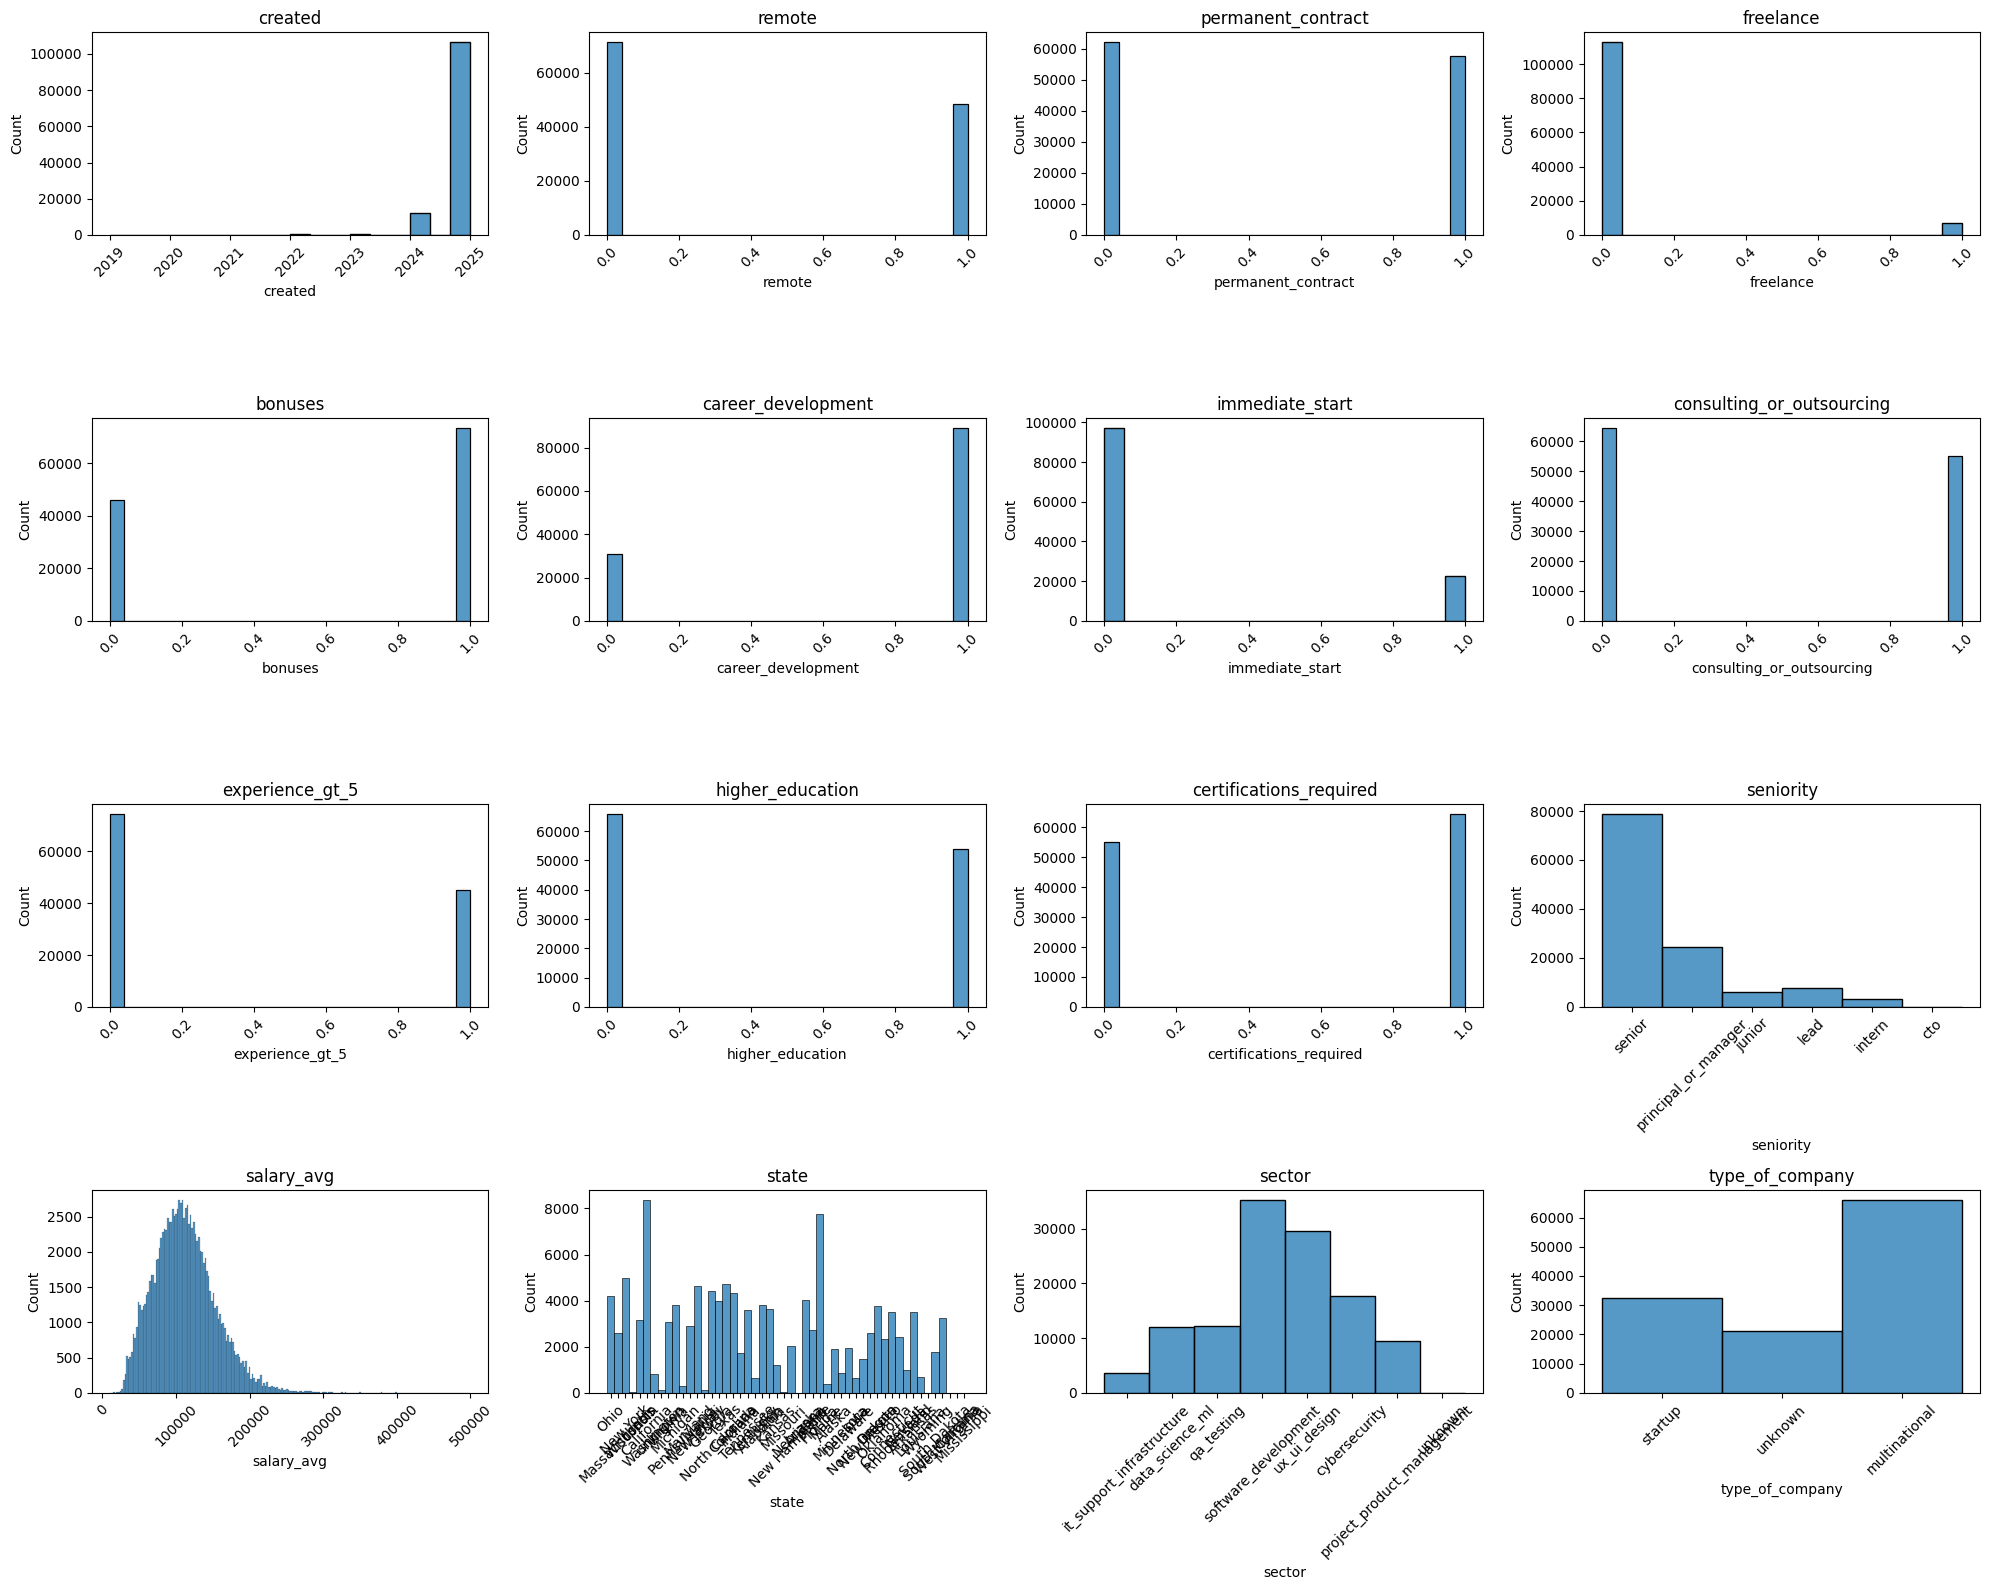

In [49]:
n = len(columns)
cols = 4
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(data=total_data, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

# Ocultar ejes restantes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()




In [50]:
total_data = total_data[total_data["sector"] != "unknown"]

In [51]:
total_data["state"] = pd.factorize(total_data["state"])[0]
total_data["created"] = pd.factorize(total_data["created"])[0]
total_data["company_display_name"] = pd.factorize(total_data["company_display_name"])[0]
total_data["seniority"] = pd.factorize(total_data["seniority"])[0]
total_data["type_of_company"] = pd.factorize(total_data["type_of_company"])[0]
total_data["sector"] = pd.factorize(total_data["sector"])[0]

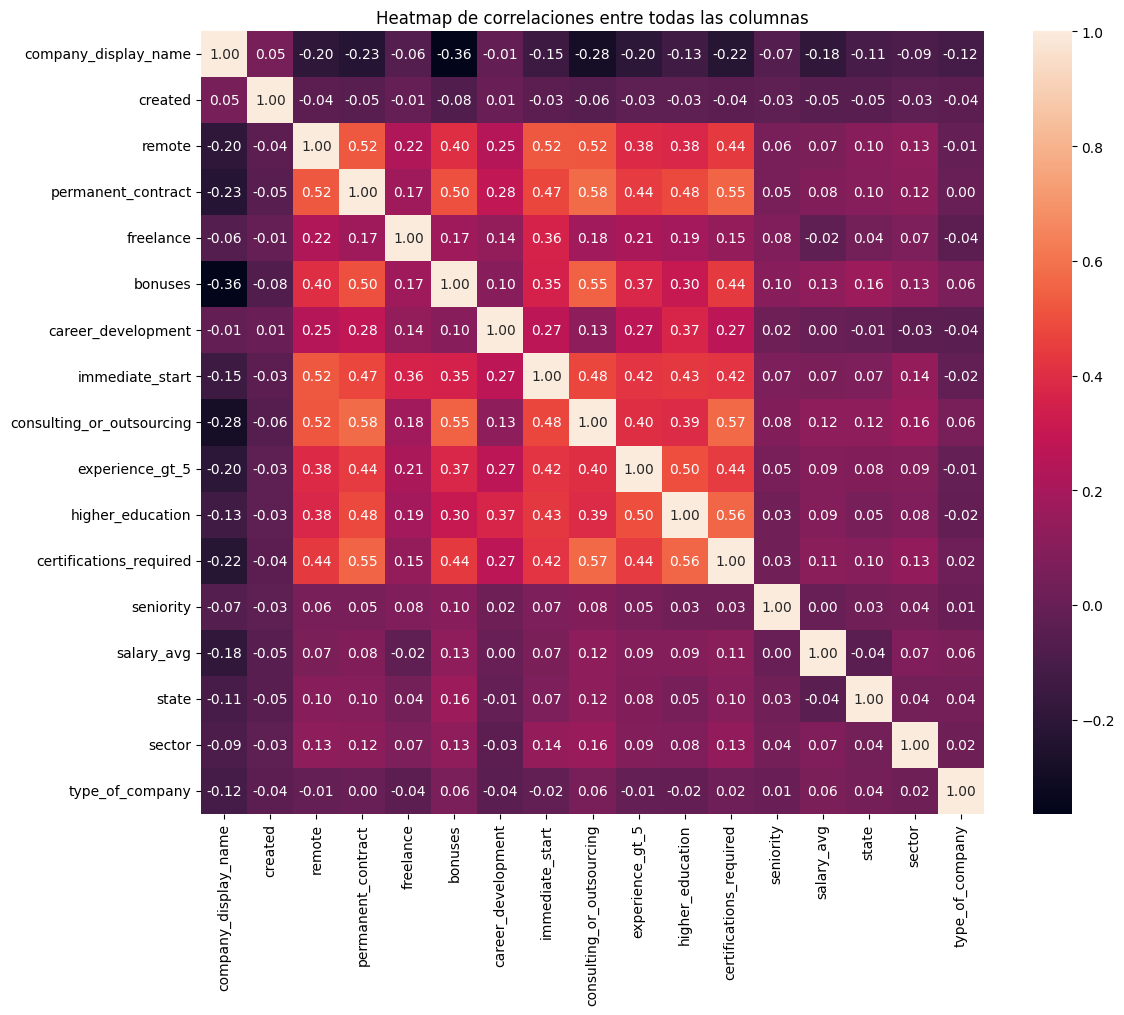

In [52]:
# Calcular matriz de correlación
corr_matrix = total_data.corr()

# Crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", square=True)
plt.title("Heatmap de correlaciones entre todas las columnas")
plt.tight_layout()
plt.show()


In [53]:
total_data.isnull().sum().sort_values(ascending=False)

company_display_name         0
created                      0
remote                       0
permanent_contract           0
freelance                    0
bonuses                      0
career_development           0
immediate_start              0
consulting_or_outsourcing    0
experience_gt_5              0
higher_education             0
certifications_required      0
seniority                    0
salary_avg                   0
state                        0
sector                       0
type_of_company              0
dtype: int64

## División en `train` y `test`

In [54]:
X = total_data.drop("salary_avg", axis=1)
y = total_data["salary_avg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.to_excel("../data/processed/X_train.xlsx", index=False)
X_test.to_excel("../data/processed/X_test.xlsx", index=False)
y_train.to_excel("../data/processed/y_train.xlsx", index=False)
y_test.to_excel("../data/processed/y_test.xlsx", index=False)


## Feature selection

In [55]:
selection_model = SelectKBest(k = 9)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]

X_train_sel = pd.DataFrame(
    selection_model.transform(X_train),
    columns=selected_columns
)

X_test_sel = pd.DataFrame(
    selection_model.transform(X_test),
    columns=selected_columns
)


with open("../models/feature_selection_k_9.json", "w") as f:
    json.dump(X_train_sel.columns.tolist(), f)

X_train_sel.head()

,remote,permanent_contract,freelance,immediate_start,consulting_or_outsourcing,experience_gt_5,seniority,state,type_of_company
0,1,0,0,0,1,0,4,36,2
1,1,0,0,0,0,0,1,5,0
2,0,1,0,0,1,0,3,16,2
3,0,1,0,0,0,1,0,8,2
4,1,1,0,1,1,0,1,28,2


In [56]:
X_train_sel["salary_avg"] = y_train.values
X_test_sel["salary_avg"] = y_test.values

X_train_sel.to_csv("../data/processed/clean_train_k_9.csv", index=False)
X_test_sel.to_csv("../data/processed/clean_test_k_9.csv", index=False)

In [57]:
total_data.shape

(119729, 17)